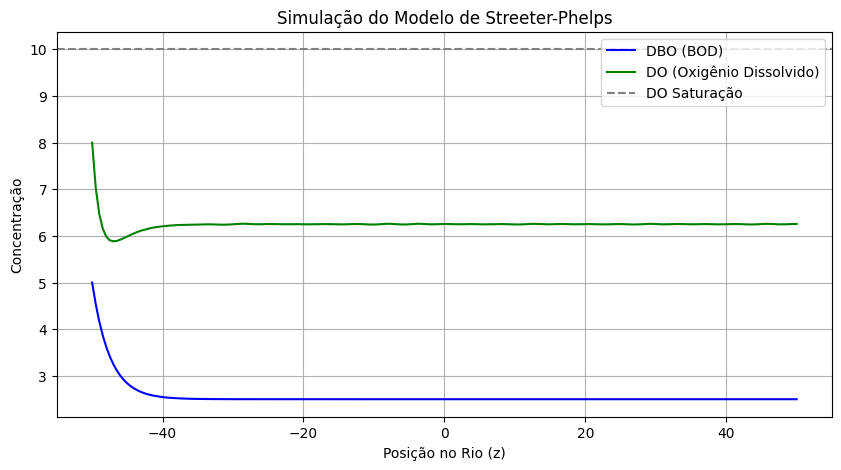

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parâmetros do modelo
v = 1.0      # Velocidade do rio (m/s)
K = 0.1      # Coeficiente de difusão
k1 = 0.2     # Taxa de consumo de oxigênio pela DBO
k2 = 0.3     # Taxa de reaeração
k3 = 0.1     # Taxa de decomposição da DBO
Ba = 0.5     # Entrada de poluição
Ds = 10.0    # Nível de saturação do oxigênio dissolvido
c = 0.5      # Velocidade da onda viajante

# Sistema de equações diferenciais transformado
def streeter_phelps(z, Y):
    B, D = Y  # Separando as variáveis
    dBdz = (K * (-B) - k3 * B + Ba) / c # K * -B é o termo de difusão da Demanda Bioquímica de Oxigênio (DBO); -k3 * B é a decomposição da matéria orgânica na DBO; Ba é a entrada contínua de poluição no sistema
    dDdz = (K * (-D) - k1 * B + k2 * (Ds - D)) / c # K * -D é o termo de difusão 
    return [dBdz, dDdz]

# Condições iniciais
B0 = 5.0   # Concentração inicial de DBO
D0 = 8.0   # Concentração inicial de DO
Y0 = [B0, D0]

# Intervalo de solução
z_span = (-50, 50)  # Simulamos a solução ao longo do espaço
z_eval = np.linspace(z_span[0], z_span[1], 200)

# Resolver o sistema de equações
dados = solve_ivp(streeter_phelps, z_span, Y0, t_eval=z_eval, method='RK45')

# Plotar os resultados
plt.figure(figsize=(10, 5))
plt.plot(dados.t, dados.y[0], label='DBO (BOD)', color='b')
plt.plot(dados.t, dados.y[1], label='DO (Oxigênio Dissolvido)', color='g')
plt.axhline(Ds, linestyle='--', color='gray', label='DO Saturação')
plt.xlabel('Posição no Rio (z)')
plt.ylabel('Concentração')
plt.legend()
plt.title('Simulação do Modelo de Streeter-Phelps')
plt.grid()
plt.show()
